In [2]:
import numpy as np
import matplotlib.pyplot as plt
import PIL

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator
from qiskit.providers.ibmq import least_busy

from PIL import Image

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2022-09-21 16:41:47,771: Credentials are already in use. The existing account in the session will be replaced.


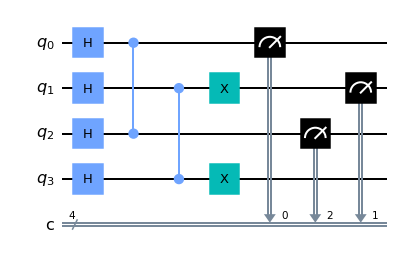

In [16]:
qc_image = QuantumCircuit(4,4)

for i in range(4):
    qc_image.h(i)

qc_image.cz(0,2)
qc_image.cz(1,3)

qc_image.x(1)
qc_image.x(3)

qc_image.measure([0,1,2], [0,1,2])
    
qc_image.draw()

In [7]:
def plot_image4x4_brightened(img, title: str):
    plt.title(title)
    plt.imshow(img, extent=[0, 4, 4, 0], vmin=0, vmax=0.34, cmap='gray')
    plt.show()

{'0101': 502, '0001': 522, '0010': 496, '0110': 481, '0100': 505, '0000': 482, '0011': 517, '0111': 495}


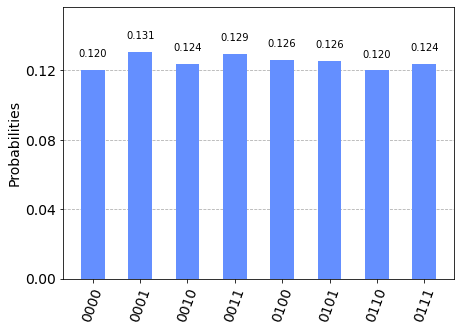

In [17]:
#Firstly, with a simulator:
simulator = Aer.get_backend('aer_simulator')
qc_image_transpiled = transpile(qc_image, simulator)

qc_image_sim_result = simulator.run(qc_image_transpiled, shots=4000).result()
qc_image_sim_counts = qc_image_sim_result.get_counts()

print(qc_image_sim_counts)
plot_histogram(qc_image_sim_counts)

In [10]:
# We need to convert this python dict into a pixel array, which we do like so:
get_bin = lambda x, n: format(x, 'b').zfill(n)

sim_image_counts = [qc_image_sim_counts[get_bin(i,4)] for i in range(2**4)]
            
    
np_sim_image_counts = np.array(sim_image_counts)
np_sim_image_counts = np_sim_image_counts / 4000
# We need to square root evvery vale to determine the amplitudes
np_sim_image_counts = np.sqrt(np_sim_image_counts)
np_sim_image_counts = normalize(np_sim_image_counts)

np_sim_image_counts = np_sim_image_counts.reshape((4,4))

print(np_sim_image_counts)

plot_image4x4_brightened(np_sim_image_counts, "Simulator Output; 4000 shots")

Traceback (most recent call last):
  File /opt/conda/lib/python3.8/site-packages/IPython/core/compilerop.py:105 in ast_parse
    return compile(source, filename, symbol, self.flags | PyCF_ONLY_AST, 1)
  Input In [10]
    np_sim_image_counts = np.array(sim_image_counts)
                                                    ^
IndentationError: expected an indented block

Use %tb to get the full traceback.


In [18]:
def get_image_counts(counts, n):
    return_counts = []
    for i in range(2**n):
        if get_bin(i,n) in counts:
            return_counts.append(counts[get_bin(i,n)])
        else:
            return_counts.append(0)
    
    return return_counts

print(get_image_counts(qc_image_sim_counts,4))

[482, 522, 496, 517, 505, 502, 481, 495, 0, 0, 0, 0, 0, 0, 0, 0]


str